In [12]:
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

data = pd.read_csv('./data/DATASET.CSV')
print(f'{data.info()}')
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB
None


,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
...,...,...
52697,Yes the best,POSITIVE
52698,Spotify won my heart in Feb 2024 You won my he...,POSITIVE
52699,I tried to open the app and it wont open I res...,POSITIVE
52700,Good,POSITIVE


In [13]:
print(f'NULL before claning: {data.isnull().sum()}\n')

data.dropna(subset=['Review'], inplace=True)

print(f'NULL after claning:{data.isnull().sum()}')

NULL before claning: Review    16
label      0
dtype: int64

NULL after claning:Review    0
label     0
dtype: int64


label
NEGATIVE    29423
POSITIVE    23263
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

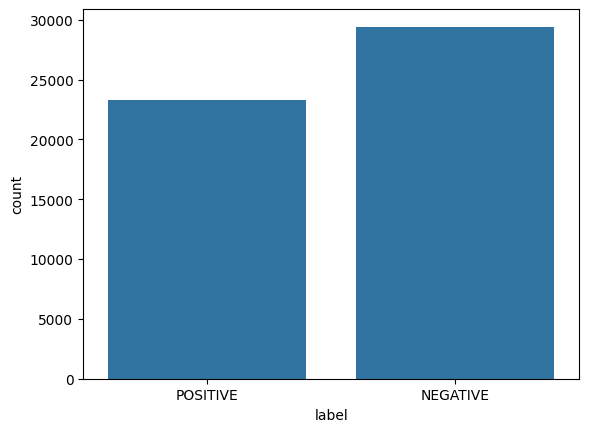

In [14]:
print(f'{data["label"].value_counts()}')
sns.countplot(data, x='label')

CLEANING

In [15]:
from text_preprocessor_package.preprocessor import TextPreprocessor
preprocessor = TextPreprocessor()
lista_zdan = data['Review'].tolist()
cleaned_data = preprocessor.main(lista_zdan)
cleaned_data

['great music service audio high quality app easy use also quick friendly support',
 'please ignore previous negative rating app super great give five stars',
 'pop get best spotify experience android annoying please let get rid',
 'really buggy terrible use recently',
 'dear spotify get songs put playlist shuffle play',
 'player controls sometimes disappear reason app restart forgets playing fixes issue',
 'love selection lyrics provided song listening',
 'still extremely slow changing storage external sd card convinced done purpose spotify knows issue done nothing solve time changed sd cards faster read write speeds samsung brand please add like song never appear searches playlists',
 'great app best mp music app ever used one problem play songs find songs despite app wonderful recommend best',
 'deleting app following reasons app failing business model whether streaming services like consumer want pay music fully ads successively upon logging single song much closed app ad number pa

In [16]:
from text_preprocessor_package.preprocessor import TextPreprocessor
preprocessor = TextPreprocessor()
cleaned_data = preprocessor.main(data['Review'])
cleaned_data[0]

'great music service audio high quality app easy use also quick friendly support'

In [17]:
import joblib
tfidf = TfidfVectorizer(max_features=10000, lowercase=True, stop_words='english')
X = tfidf.fit_transform(cleaned_data).toarray()
joblib.dump(tfidf, 'model/vectorizer.pkl')

print("TF-IDF vector for first review:", X[0])


non_zero_indices = X[0].nonzero()[0]  
non_zero_values = X[0][non_zero_indices] 

feature_names = tfidf.get_feature_names_out()
important_words = [(feature_names[i], non_zero_values[j]) for j, i in enumerate(non_zero_indices)]

print("\nNon-zero TF-IDF values for first review:")
for word, score in important_words:
    print(f"{word}: {score}")

TF-IDF vector for first review: [0. 0. 0. ... 0. 0. 0.]

Non-zero TF-IDF values for first review:
app: 0.11032914295952617
audio: 0.3167521228525944
easy: 0.2575371821563422
friendly: 0.37211785937626246
great: 0.19131222557118832
high: 0.3718999370180276
music: 0.12551724520423285
quality: 0.2731490764943725
quick: 0.4339633229683996
service: 0.26947138237452567
support: 0.3370433035142288
use: 0.20709023090814857


In [18]:
label_encoder = LabelEncoder()
labels = data['label'].values
encoded_labels = label_encoder.fit_transform(labels)

joblib.dump(encoded_labels, 'model/label_encoder.pkl')

['model/label_encoder.pkl']